In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\user\miniconda3\envs\bd\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# training data prepare

In [2]:
df_train=pd.read_csv('./data/train.csv')

In [3]:
#build label
df_train_label=pd.DataFrame(df_train['Survived'])

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 去掉很明顯無關或資料缺失過多的特徵
# 乘客號碼(PassengerId),標籤(survived),名字(name),票號(Ticket),船艙號碼(Cabin),
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

# $EDA---Survived\ correlation$

In [7]:
#pclass:艙位,sex:性別,Age:年齡,Sibsp:在船上同為兄弟姐妹或配偶的數目,parch:在船上同為家族的父母及小孩的數目
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

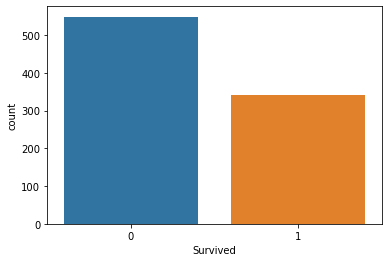

In [8]:
#存活人數
sns.countplot(x='Survived',data=df_train)

# $From\ Pclass\ to\ Age\ and\ Sex$

<AxesSubplot:xlabel='Pclass', ylabel='count'>

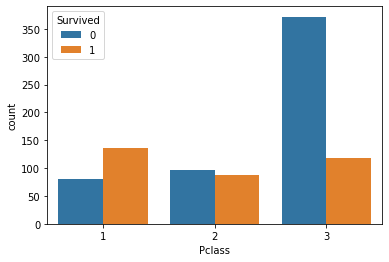

In [9]:
#哪個船艙死最多人
#problem---什麼樣的人會去住三號船艙
sns.countplot(x=df_train['Pclass'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

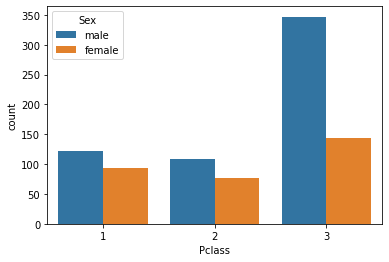

In [10]:
#三號船艙男生最多
#problem---性別跟存活相關性
sns.countplot(x=df_train['Pclass'],hue=df_train['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

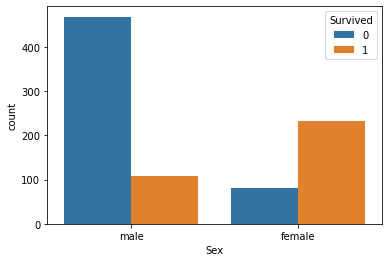

In [11]:
#性別和存活相關性--男生死最多
sns.countplot(x=df_train['Sex'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

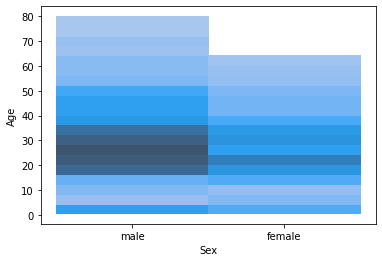

In [12]:
#性別vs年齡 20~30歲居多是男生
sns.histplot(x=df_train['Sex'],y=df_train['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

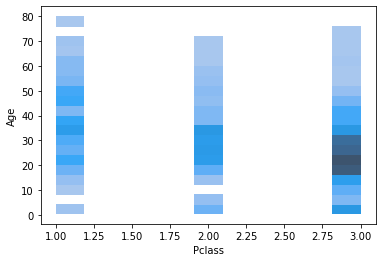

In [13]:
#船艙vs年齡  20~30歲集中在3號船艙
sns.histplot(x=df_train['Pclass'],y=df_train['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

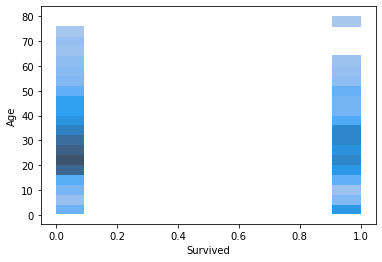

In [14]:
#三號船艙:死亡人數最多,且居多是20~30歲的男性
#特徵:船艙,年齡,性別和存活有相關性
sns.histplot(x=df_train['Survived'],y=df_train['Age'])

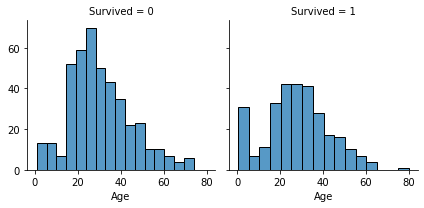

In [15]:
#result
s=sns.FacetGrid(df_train,col='Survived')
s.map(sns.histplot,'Age',kde=False)

# SibSp:spouce ,siblings  

<AxesSubplot:xlabel='SibSp', ylabel='count'>

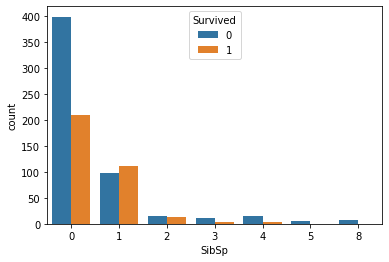

In [16]:
#有配偶和兄弟姊妹的人和是否存活成正相關
sns.countplot(x=df_train['SibSp'],hue=df_train['Survived'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

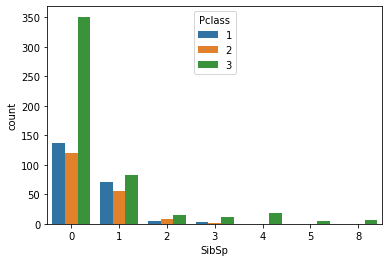

In [17]:
#配偶兄弟姊妹vs船艙分布
#三號船艙的人幾乎沒有配偶或兄弟姊妹----推斷是三號艙20~30歲的男生----和存活成相關性
sns.countplot(x=df_train['SibSp'],hue=df_train['Pclass'])

# $Parch:parent ,\ children$

<AxesSubplot:xlabel='Parch', ylabel='count'>

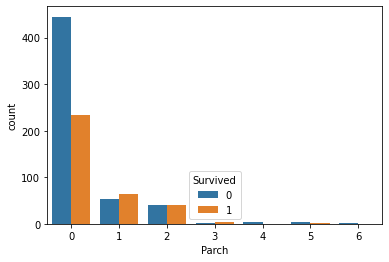

In [18]:
#有沒有父母和小孩和存活成正相關
sns.countplot(x=df_train['Parch'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

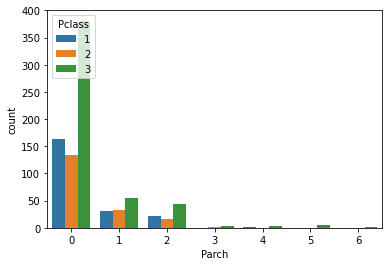

In [19]:
#父母小孩vs船艙分布
#三號船艙的人幾乎沒有小孩和父母----推斷是三號艙20~30歲的男生----和存活成相關性
sns.countplot(x=df_train['Parch'],hue=df_train['Pclass'])
#推論:三號船艙的男生是出來打拼20~30歲的年輕人

# $Embark$

<AxesSubplot:xlabel='Embarked', ylabel='count'>

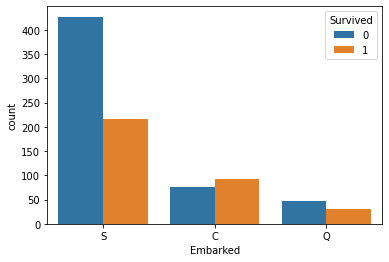

In [20]:
#在S點上船的人死最多---S點的人被分配到哪個船艙
sns.countplot(x=df_train['Embarked'],hue=df_train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

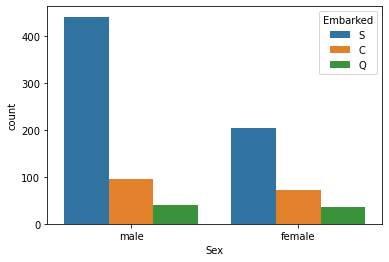

In [21]:
#性別和上船地點
#男生多半是從S點上船
sns.countplot(x=df_train['Sex'],hue=df_train['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

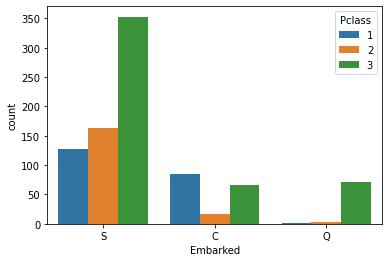

In [22]:
#S點的人多半被分配到三號船艙----推論三號船艙20~30歲的男姓幾乎是從S點上船的----和存活成相關性
sns.countplot(x=df_train['Embarked'],hue=df_train['Pclass'])

# $Fare$

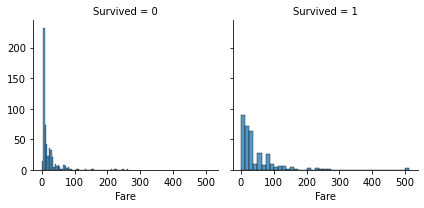

In [23]:
#越貼近免費死越多人
s=sns.FacetGrid(df_train,col='Survived')
s.map(sns.histplot,'Fare',kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

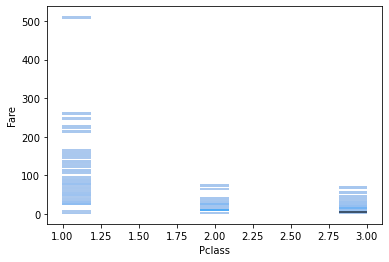

In [24]:
#船艙和價格關係----1號船艙比其他船艙價格貴
#三號船艙住低價房的人多-----推論是那些20~30歲男性
sns.histplot(x=df_train['Pclass'],y=df_train['Fare'])

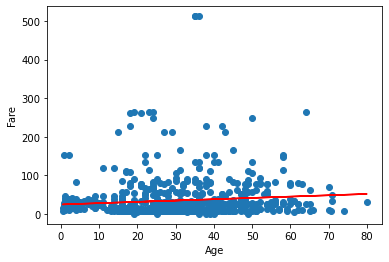

In [25]:
x=np.array(df_train.dropna()['Age']).reshape(-1,1)
y=np.array(df_train.dropna()['Fare'])
reg=LinearRegression()
reg.fit(x,y)
#年齡vs價格---非正相關 
plt.scatter(df_train['Age'],df_train['Fare'])
plt.plot(x,reg.predict(x),color='r')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='Fare'>

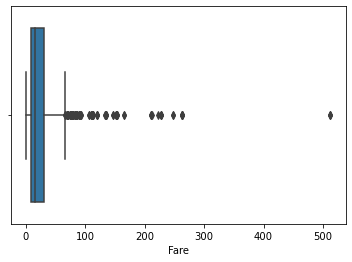

In [26]:
#see outlier
sns.boxplot(x=df_train['Fare'],data=df_train)

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

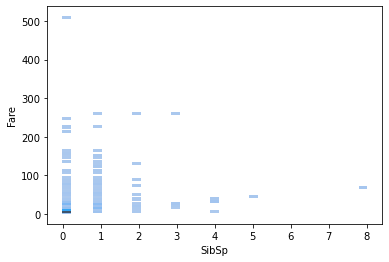

In [27]:
#兄弟姊妹和配偶數量vs價格-----無相關性
sns.histplot(x=df_train['SibSp'],y=df_train['Fare'])

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

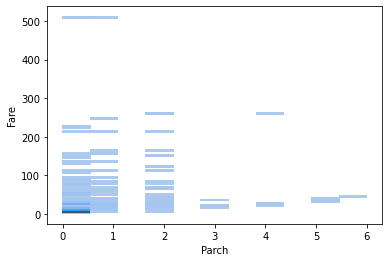

In [28]:
#父母小孩數量vs價格----無相關性
sns.histplot(x=df_train['Parch'],y=df_train['Fare'])

In [29]:
#船艙,年齡,性別,上船位置,父母小孩,配偶兄弟姊妹,價格皆與存活相關
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [30]:
#drop label
df_train.drop(['Survived'],axis=1,inplace=True)

# build model

# $data\ preprocess$

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [33]:
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [34]:
#fill nan with mean 
df_train.Age.fillna(df_train.Age.mean(),inplace=True)

In [35]:
df_train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [36]:
#fill nan with the largest count embarked
df_train.Embarked.fillna('S',inplace=True)

In [37]:
df_train.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       891
dtype: int64

In [38]:
#replace number to label
#sex:male,female ---0,1
#embarked:S,C,Q----0,1,2
replace = LabelEncoder()

#sex
replace.fit(df_train.Sex)
Sex_label = replace.transform(df_train.Sex)
df_train['Sex_label'] = Sex_label
df_train.drop(['Sex'],axis=1,inplace=True)

#embarked
replace.fit(df_train.Embarked)
Embarked_label = replace.transform(df_train.Embarked)
df_train['Embarked_label'] = Embarked_label
df_train.drop(['Embarked'],axis=1,inplace=True)


In [39]:
df_train

,Pclass,Age,SibSp,Parch,Fare,Sex_label,Embarked_label
0,3,22.000000,1,0,7.2500,1,2
1,1,38.000000,1,0,71.2833,0,0
2,3,26.000000,0,0,7.9250,0,2
3,1,35.000000,1,0,53.1000,0,2
4,3,35.000000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,2
887,1,19.000000,0,0,30.0000,0,2
888,3,29.699118,1,2,23.4500,0,2
889,1,26.000000,0,0,30.0000,1,0


In [40]:
#normalize
normal= StandardScaler()

X=np.array(df_train)
y=np.array(df_train_label)

X_norm=normal.fit_transform(X)

In [41]:
#train_test_split
X_train,X_test,y_train,y_test=tts(X_norm,y,test_size = 0.2,random_state=1)

In [42]:
#check split
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(712, 7) (712, 1)
(179, 7) (179, 1)


In [43]:
import torch
#process torch data
def to_torch(inputs):
    return torch.tensor(inputs,dtype=torch.float32)

X_train_t=to_torch(X_train)
y_train_t=to_torch(y_train)

In [44]:
X_train_t.shape,y_train_t.shape

(torch.Size([712, 7]), torch.Size([712, 1]))

In [45]:
#test set to torch
X_test_t=to_torch(X_test)
y_test_t=to_torch(y_test)

In [46]:
X_test_t.shape,y_test_t.shape

(torch.Size([179, 7]), torch.Size([179, 1]))

# $model$

In [54]:
from tensorboardX import SummaryWriter
import torch.nn as nn
import torch
import torch.optim as optim
from itertools import product
from collections import OrderedDict,namedtuple
import torch.nn.functional as F


# $tunning\ hyperparameters---3 model\ , learning\ rate\ , sigmoid threshold$

In [55]:
#tunning method is from deeplizard:
#https://www.youtube.com/watch?v=ycxulUVoNbk&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG&index=31&ab_channel=deeplizard

class RunBuilder:
    @staticmethod
    def get_param(params):
        Run = namedtuple('Run', params.keys())
        runs = []
        for i in product(*params.values()):
            runs.append(Run(*i))
        return runs

In [56]:
#sigmoid method threshold
def threshold_sigmoid(pred,threshold):
    threshold = torch.tensor([threshold])
    results = (pred>threshold).float()*1
    return results

#accuracy check
def correct_check(pred,y):
    return (pred==y).sum().item()/y.shape[0]

# $dealing\ overfitting----drop,regularzation$

In [57]:
''''
from obseving tensorboard,we find that the hyperparameter combination:
'lr=0.01,net=net2 threshold=0.5 did the best both on train set and test set,
so we pick this combination and next fix overfitting problem by high bias on test set.'


we use dropout,regularzation and maybe advanced feature picking method in the future,but we dont have bonus data from the kaggle,so adding more data method is 
not available on this case.
'''
    
class binary_Classifier(nn.Module):
    def __init__(self,n_features,n_labels):
        super(binary_Classifier,self).__init__()
        
        self.layer=nn.Sequential(
            nn.Linear(n_features,16),
            nn.ReLU(),
            
            nn.Linear(16,12),
            nn.ReLU(),
            
            nn.Linear(12,1),
            nn.Sigmoid()
        )
        self.initialize()

        
    def initialize(self):
        for h in self.layer:
            try:
                nn.init.normal_(h.weight, mean=0.0, std=0.01)
                nn.init.uniform_(h.bias, a=0.0, b=0.001)
            except:
                pass
            
    #f(x)--->y
    def forward(self,x):
        out=self.layer(x)
        return out
    
    
    
class binary_Classifier_drop(nn.Module):
    def __init__(self,n_features,n_labels):
        super(binary_Classifier_drop,self).__init__()
        
        self.layer=nn.Sequential(
            nn.Linear(n_features,16),
            nn.ReLU(),
            
            
            nn.Dropout(0.2),
            

            nn.Linear(16,12),
            nn.ReLU(),
            
            
            nn.Linear(12,n_labels),
            nn.Sigmoid()
        )
        self.initialize()

        
    def initialize(self):
        for h in self.layer:
            try:
                nn.init.normal_(h.weight, mean=0.0, std=0.01)
                nn.init.uniform_(h.bias, a=0.0, b=0.001)
            except:
                pass
            
    #f(x)--->y
    def forward(self,x):
        out=self.layer(x)
        return out

In [58]:
#hyperparameters


net_dict={'net_no_drop':binary_Classifier(X_train_t.shape[1],y_train_t.shape[1]),
         'net_drop':binary_Classifier_drop(X_train_t.shape[1],y_train_t.shape[1])}

hparams=OrderedDict(
    weight_decay=[0],
    
    #threshold for sigmoid method
    threshold=[0.48,0.5,0.52],
    
    lr=[0.01,0.008,0.005],
    
    
    net=['net_no_drop','net_drop']
)

#build runs
runs=RunBuilder.get_param(hparams)


for run in runs:
    print(net_dict[run.net])

binary_Classifier(
  (layer): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
binary_Classifier_drop(
  (layer): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=12, bias=True)
    (4): ReLU()
    (5): Linear(in_features=12, out_features=1, bias=True)
    (6): Sigmoid()
  )
)
binary_Classifier(
  (layer): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
binary_Classifier_drop(
  (layer): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
   

In [60]:

#binary cross entropy loss
loss=nn.BCELoss() 
EPOCH=2000


#test all combinition
for run in runs:
    Classifier=net_dict[run.net]
    
    #optimizer
    optimizer=optim.Adam(Classifier.parameters(),lr=run.lr,weight_decay=run.weight_decay)
    
    #record into tensorboard
    label_tunning_param=f'weight_decay--{run.weight_decay},net--{run.net},---{run.lr},---{run.threshold}'
    tb=SummaryWriter(comment=label_tunning_param)
    tb.add_graph(Classifier,X_train_t)
    

    for ep in range(EPOCH):
        
        #train mode
        Classifier.train()
        pred=Classifier(X_train_t)
            
        cost=loss(pred,y_train_t)
        
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        
        
        #test mode
        Classifier.eval()
        pred_train=Classifier(X_train_t).detach()
        pred_train=threshold_sigmoid(pred_train,run.threshold)
        pred_test=Classifier(X_test_t).detach() #no get grad
        pred_test=threshold_sigmoid(pred_test,run.threshold)

        #comput accurate
        accuracy_train=correct_check(pred_train,y_train_t)
        accuracy_test=correct_check(pred_test,y_test_t)
            
        #check
        print('\r'+f'epoch-{ep},cost--{cost},net--{run.net},lr----{run.lr}threshold----{run.threshold},regularzation---{run.weight_decay}accuracy_train--{accuracy_train}---accuracy_test--{accuracy_test}',end='',flush=True)
        
        if accuracy_train>=0.9 and accuracy_test>=0.8:
            torch.save(Classifier, 'Classifier8.pkl')
            
        if accuracy_train>=0.91 and accuracy_test>=0.81:
            torch.save(Classifier, 'Classifier81.pkl')
            
        if accuracy_train>=0.92 and accuracy_test>=0.82:
            torch.save(Classifier, 'Classifier82.pkl')
            break
        
        tb.add_scalar('loss',cost.item(),ep)
        tb.add_scalar('accuracy_train',accuracy_train,ep)
        tb.add_scalar('accuracy_test',accuracy_test,ep)
        
        
        #record weight and gradient
        for name,weight in Classifier.named_parameters():
            tb.add_histogram(name,weight,ep)
            tb.add_histogram(f'{name}.grad',weight.grad,ep)

epoch-1999,cost--0.29975786805152893,net--net_drop,lr----0.005threshold----0.52,regularzation---0accuracy_train--0.8974719101123596---accuracy_test--0.7709497206703911816

# load model and see confusion matrix

In [61]:
#see model 
model=torch.load('Classifier8.pkl')

In [72]:
model.eval()

threshold=0.52
pred_train=threshold_sigmoid(model(X_train_t),threshold)
pred_test=threshold_sigmoid(model(X_test_t),threshold)
print(correct_check(pred_train,y_train_t))
print(correct_check(pred_test,y_test_t))

0.9002808988764045
0.8044692737430168


In [86]:
# confusion matrix
from sklearn.metrics import confusion_matrix as cm

#y_true,y_pred
cm_train=cm(y_train_t.numpy(),pred_train.numpy(),labels=[0,1.])
cm_test=cm(y_test_t.numpy(),pred_test.numpy(),labels=[0.,1.])

In [87]:
cm_train,cm_test

(array([[415,  28],
        [ 43, 226]], dtype=int64),
 array([[94, 12],
        [23, 50]], dtype=int64))

<AxesSubplot:>

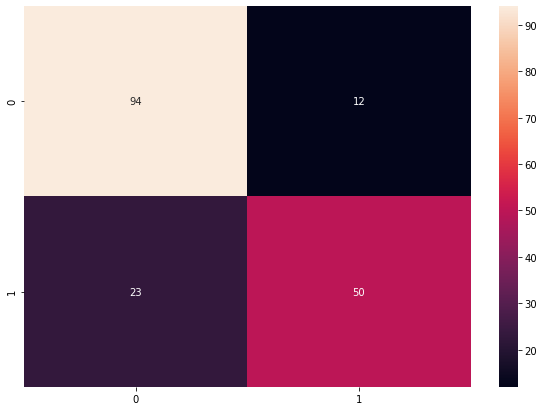

In [88]:
import seaborn as sn
import matplotlib.pyplot as plt
array = cm_test

df_cm = pd.DataFrame(array, index = range(len(cm_test)),columns = range(len(cm_test)))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# $submit\ test.csv\ data$

In [91]:
df_test=pd.read_csv('./data/test.csv')
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test.Age.fillna(df_train.Age.mean(),inplace=True)
df_test.Embarked.fillna('S',inplace=True)

In [92]:
replace = LabelEncoder()

#sex
replace.fit(df_test.Sex)
Sex_label = replace.transform(df_test.Sex)
df_test['Sex_label'] = Sex_label
df_test.drop(['Sex'],axis=1,inplace=True)

#embarked
replace.fit(df_test.Embarked)

Embarked_label = replace.transform(df_test.Embarked)

df_test['Embarked_label'] = Embarked_label
df_test.drop(['Embarked'],axis=1,inplace=True)

In [96]:
np.array(df_test).shape

(418, 7)

In [102]:
#normalize
normal= StandardScaler()

X_test=np.array(df_test)
X_test_norm=normal.fit_transform(X_test)
X_test_norm_t=to_torch(X_test_norm)

In [104]:
X_test_norm_t.shape

torch.Size([418, 7])

In [108]:
model.eval()
threshold=0.52
pred_test_t=threshold_sigmoid(model(X_test_norm_t),threshold)

In [114]:
Survived=pred_test_t.numpy().flatten().astype('int32')

In [116]:
#submit
PassengerId = np.arange(892,1310)

submit = pd.DataFrame(list(zip(PassengerId,Survived)),columns=['PassengerId','Survived'])

In [117]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
submit.to_csv("final_ans.csv",index=False)